In [1]:
import sys
sys.path.append('./')

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/ubuntu/anaconda3/envs/tf2_pcse/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [4]:
from SIMPLE.crop import *

## Loading parameters

In [5]:
crop_params = pd.read_csv('./SIMPLE/params/crop_params.csv', index_col='Crop')
soil_params = pd.read_csv('./SIMPLE/params/soil_params.csv', index_col='Crop')

In [6]:
crop_params = crop_params.loc['Tomato']
soil_params = soil_params.loc['Tomato']

In [7]:
crop_params

,Cultivar,T_sum,HI,I_50A,I_50B,T_base,T_opt,RUE,I_50maxH,I_50maxW,T_heat,T_ext,S_CO2,S_water
Crop,,,,,,,,,,,,,,
Tomato,SunnySD,2800,0.68,520,400,6,26,1.0,100,5,32,45,0.07,2.5
Tomato,Agriset761,2300,0.50,550,300,6,26,1.0,100,5,32,45,0.07,2.5


In [8]:
soil_params

,Site1,Site2,Treatment,Year,AWC,RCN,DDC,RZD
Crop,,,,,,,,
Tomato,Gainesville,USA,NaN,1996,0.19,85.0,0.1,800.0
Tomato,Bradenton,USA,NaN,1994,0.14,66.0,0.5,1000.0


In [9]:
crop_params = crop_params.values[0, 1:]
soil_params = soil_params.values[0, 4:]

## Loading weather data

In [10]:
weather_df = pd.read_csv('./sample_input/UFGA9601.txt', index_col='DATE', delim_whitespace=True)

In [11]:
weather_df = weather_df.iloc[:-1, :3]
weather_df['CO2'] = 400
weather_df = weather_df[['TMAX', 'TMIN', 'SRAD', 'CO2']]

In [12]:
cultvation_period = int(weather_df.index[-1]) - int(weather_df.index[0])

In [13]:
weather_df.head()

,TMAX,TMIN,SRAD,CO2
DATE,,,,
96060,18.55,11.41,4.26,400
96061,11.41,6.52,2.13,400
96062,19.96,4.85,15.46,400
96063,23.31,2.53,21.24,400
96064,24.37,1.61,20.53,400


## Simulation

In [14]:
test_tomato = Crop(crop_params, soil_params)

In [15]:
yields, TTs, biomass, days, solar = test_tomato.run(weather_df.values)

In [16]:
output_df = pd.DataFrame([days, TTs, biomass, solar]).T
output_df.columns = ['date', 'cum_temp', 'biomass', 'solar']
output_df['date'] = output_df['date'].astype(int)
output_df = output_df.set_index('date')

In [17]:
output_df['yield'] = np.nan
output_df.iloc[-1, -1] = yields

In [18]:
output_df.to_csv('./results/SIMPLE_tomato_out.csv')

## Plotting

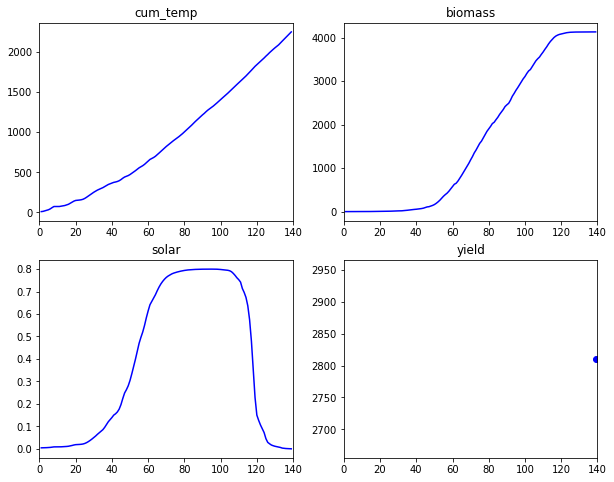

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
for var, ax in zip(['cum_temp', 'biomass', 'solar', 'yield'], axes.flatten()):
    if var == 'yield':
        ax.plot(output_df.index, output_df[var], 'bo')
        ax.set_title(var)
        ax.set_xbound([output_df.index[0]-1, output_df.index[-1]+1])
        break
    ax.plot(output_df.index, output_df[var], 'b-')
    ax.set_title(var)
    ax.set_xbound([output_df.index[0]-1, output_df.index[-1]+1])
    
# fig.autofmt_xdate()
# fig.savefig('./results/sugarbeet.png')